In [ ]:
from google.colab import drive 
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE =256
BATCH_SIZE=32
CHANNELS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/grive/MyDrive/Data/plant',
                                                    shuffle= True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
# in the above we got 3 classes which represents 3 folders with different images so all 3 folders included we ahve 2152 images

In [ ]:
# viewing our classes 
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset) # why 68 because our batch size is 32 when we multiply 32*68 = 2152 which is our total size of images 

68

In [ ]:
68*32

2176

In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy()) # why numpy here because every element we get is tensor so we need to convert

(32, 256, 256, 3)
[0 0 1 1 1 1 1 1 0 0 0 1 2 1 0 1 0 1 2 1 2 1 1 1 0 2 2 0 0 1 1 1]


In [ ]:
#printing 1 st image
for image_batch,label_batch in dataset.take(1):
   print(image_batch[0]) # tensor output 
   print('*********************************************************')
   print(image_batch[0].numpy())

tf.Tensor(
[[[132. 130. 144.]
  [123. 121. 135.]
  [148. 146. 160.]
  ...
  [133. 129. 144.]
  [ 92.  88. 103.]
  [105. 101. 116.]]

 [[125. 123. 137.]
  [151. 149. 163.]
  [157. 155. 169.]
  ...
  [112. 108. 123.]
  [112. 108. 123.]
  [106. 102. 117.]]

 [[ 96.  94. 108.]
  [117. 115. 129.]
  [121. 119. 133.]
  ...
  [108. 104. 119.]
  [109. 105. 120.]
  [129. 125. 140.]]

 ...

 [[171. 173. 185.]
  [176. 178. 190.]
  [182. 184. 196.]
  ...
  [155. 156. 174.]
  [157. 158. 176.]
  [157. 158. 176.]]

 [[176. 178. 190.]
  [174. 176. 188.]
  [180. 182. 194.]
  ...
  [154. 155. 173.]
  [158. 159. 177.]
  [158. 159. 177.]]

 [[179. 181. 193.]
  [167. 169. 181.]
  [173. 175. 187.]
  ...
  [156. 157. 175.]
  [160. 161. 179.]
  [162. 163. 181.]]], shape=(256, 256, 3), dtype=float32)
*********************************************************
[[[132. 130. 144.]
  [123. 121. 135.]
  [148. 146. 160.]
  ...
  [133. 129. 144.]
  [ 92.  88. 103.]
  [105. 101. 116.]]

 [[125. 123. 137.]
  [151. 149. 16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


*********************************************************


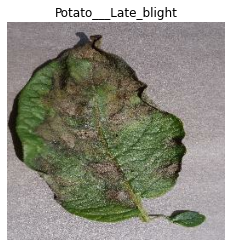

In [ ]:
for image_batch,label_batch in dataset.take(1):
   plt.imshow(image_batch[0].numpy()) # tensor output 
   print('*********************************************************')
   plt.imshow(image_batch[0].numpy().astype('uint8'))
   plt.title(class_names[label_batch[0]]) # we have to use class names to acces label batch
   plt.axis('off')

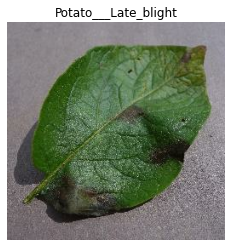

In [ ]:
# we will give only one image becasue we didhave asubplot 
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]]) # always acces through a list for class names 
    plt.axis('off')

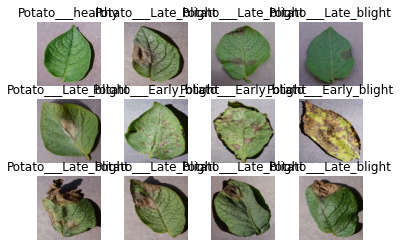

In [ ]:
# to view all 12 images 
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]]) # always acces through a list for class names 
    plt.axis('off')

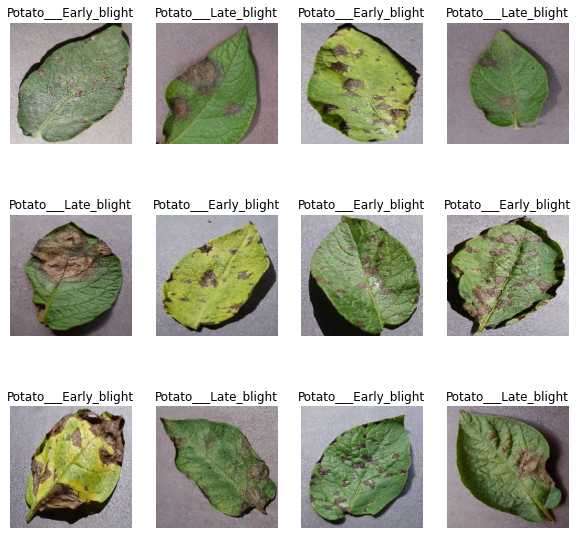

In [ ]:
# same as above code but we want a clean image 
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]]) # always acces through a list for class names 
    plt.axis('off')

In [ ]:
# splittng our dataset 
#our dataset is 68 when actucal length is 68*32 
# 80% training 
#20 ----10% for validation 10% for test 

In [ ]:
EPOCHS= 50 

In [ ]:
 dataset.take(10) # will tae first 10 samples 
 train_size= 0.8
 len(dataset)*train_size

54.400000000000006

In [ ]:
# train dataset
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
# test dataset 
test_ds=dataset.skip(54)
len(test_ds)

14

In [ ]:
# validation dataset from test dataset 
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
#validation dataset
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
# test dataset
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size= len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)
  
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)
  
  val_ds = ds.skip(train_size).take(val_size)
  test_ds =ds.skip(train_size).skip(val_size)
  return train_ds ,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
#to improve performance for trainig 
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# preprocesing and normalization 
resize_and_rescale=tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# dataaugumentation 
data_augumentation=tf.keras.Sequential([
                     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
# building our convolution layer 
input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model =models.Sequential([
                          resize_and_rescale,
                          data_augumentation,
                          layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64,activation='relu'),
                          layers.Dense(n_classes,activation='softmax'),



])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
# compiling 
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 18s 214ms/step - loss: 0.8901 - accuracy: 0.4838 - val_loss: 0.7637 - val_accuracy: 0.6354
Epoch 2/50
54/54 [==============================] - 6s 120ms/step - loss: 0.7049 - accuracy: 0.6667 - val_loss: 0.5142 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 6s 120ms/step - loss: 0.5456 - accuracy: 0.7535 - val_loss: 0.4536 - val_accuracy: 0.7708
Epoch 4/50
54/54 [==============================] - 7s 121ms/step - loss: 0.4438 - accuracy: 0.8113 - val_loss: 0.3812 - val_accuracy: 0.8385
Epoch 5/50
54/54 [==============================] - 6s 120ms/step - loss: 0.3576 - accuracy: 0.8576 - val_loss: 0.3674 - val_accuracy: 0.8490
Epoch 6/50
54/54 [==============================] - 6s 120ms/step - loss: 0.3359 - accuracy: 0.8669 - val_loss: 0.3732 - val_accuracy: 0.8438
Epoch 7/50
54/54 [==============================] - 6s 120ms/step - loss: 0.2827 - accuracy: 0.8953 - val_loss: 0.2107 - val_accuracy: 0.9271
Epoch

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 5s 38ms/step - loss: 0.3983 - accuracy: 0.8945


[0.39828982949256897, 0.89453125]

In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.48379629850387573,
 0.6666666865348816,
 0.7534722089767456,
 0.8113425970077515,
 0.8576388955116272,
 0.8668981194496155,
 0.8952546119689941,
 0.9184027910232544,
 0.9108796119689941,
 0.9618055820465088,
 0.9560185074806213,
 0.9565972089767456,
 0.9716435074806213,
 0.9745370149612427,
 0.9681712985038757,
 0.9809027910232544,
 0.9832175970077515,
 0.9785879850387573,
 0.9774305820465088,
 0.9884259104728699,
 0.9826388955116272,
 0.9785879850387573,
 0.984375,
 0.9901620149612427,
 0.9930555820465088,
 0.9751157164573669,
 0.9861111044883728,
 0.9884259104728699,
 0.9907407164573669,
 0.9913194179534912,
 0.9918981194496155,
 0.9866898059844971,
 0.9832175970077515,
 0.9861111044883728,
 0.9878472089767456,
 0.9866898059844971,
 0.984375,
 0.9861111044883728,
 0.9907407164573669,
 0.9890046119689941,
 0.9930555820465088,
 0.9953703880310059,
 0.9855324029922485,
 0.9936342835426331,
 0.9872685074806213,
 0.9930555820465088,
 0.9872685074806213,
 0.9901620149612427,
 0.99131941

In [ ]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

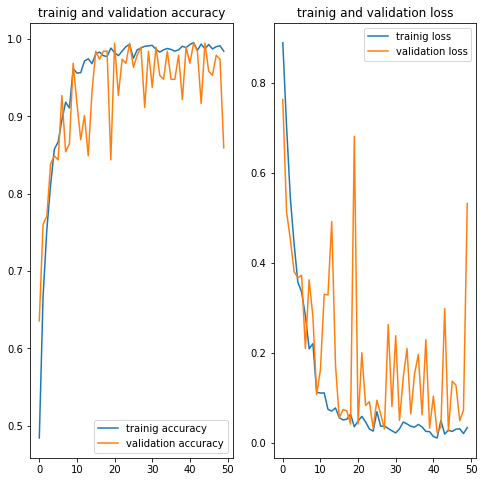

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='trainig accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('trainig and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='trainig loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('trainig and validation loss')
plt.show()


first image to predict
actual label Potato___Late_blight
[6.8065320e-04 9.9931931e-01 5.3543413e-08]
Potato___Late_blight


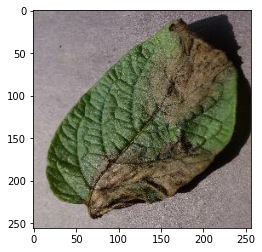

In [ ]:
import numpy as np

for image_batch,label_batch in test_ds.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0]

  print('first image to predict')
  plt.imshow(first_image)
  print("actual label",class_names[first_label])

  batch_prediction = model.predict(image_batch) # our model will predict a batch of 32 images 
  print(batch_prediction[0])# we will get 3 output is because of softmax has 3 output we need to take the highest value as our class 
  print(class_names[np.argmax(batch_prediction[0])])

In [ ]:
# now we 
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy()) # converting into image array
  img_array=tf.expand_dims(img_array,0) # creating a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.argmax(predictions)),2)
  return predicted_class , confidence

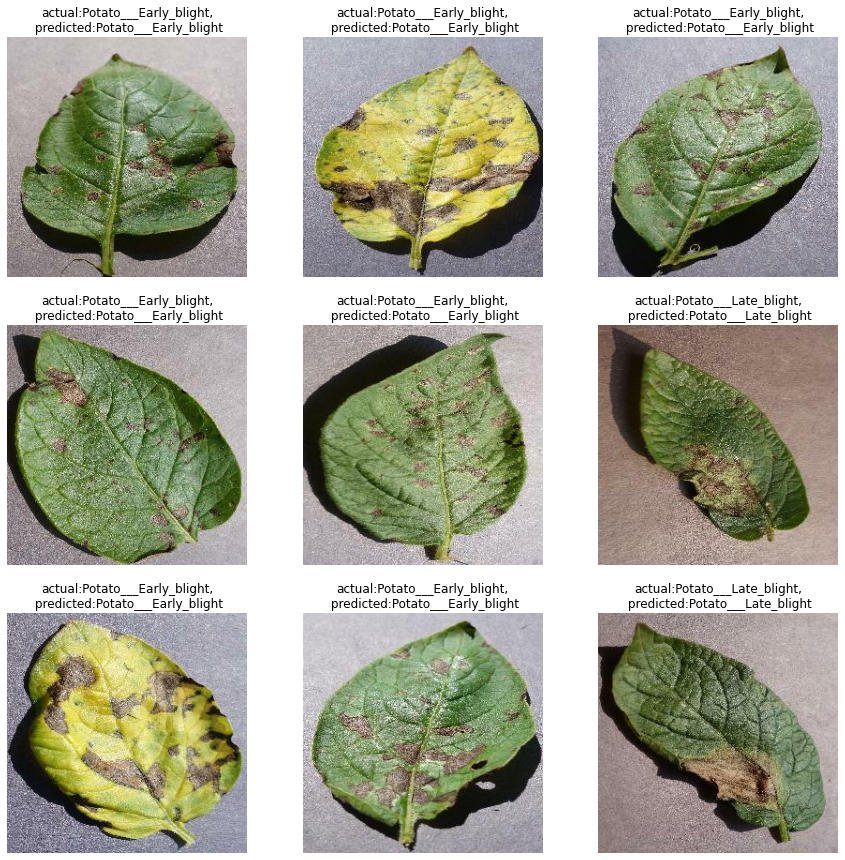

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f'actual:{actual_class},\n predicted:{predicted_class}') # will dispaly at top of every image
    plt.axis('off')